Coeficiente de regresión: 1.57
Intercepto: 34.52
Error cuadrático medio (MSE): 1149.29
Coeficiente de determinación (R²): 0.92


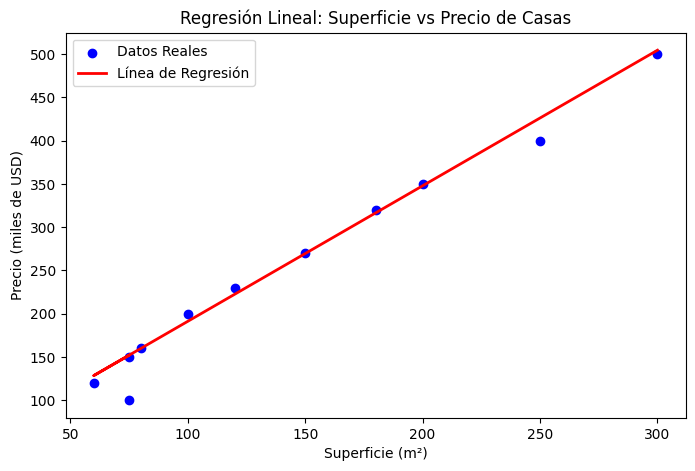

In [30]:
# OPCION 01 sklearn.linear_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Datos realistas de superficies (m²) y precios (miles de dólares)
data = {
    'Superficie_m2': [75, 60, 75, 80, 100, 120, 150, 180, 200, 250, 300],
    'Precio_kUSD': [100, 120, 150, 160, 200, 230, 270, 320, 350, 400, 500]
}

df = pd.DataFrame(data)

# Separar variables predictoras y objetivo
X = df[['Superficie_m2']]
y = df['Precio_kUSD']

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coeficiente de regresión: {modelo.coef_[0]:.2f}")
print(f"Intercepto: {modelo.intercept_:.2f}")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

# Visualización del modelo
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label="Datos Reales")
plt.plot(X, modelo.predict(X), color='red', linewidth=2, label="Línea de Regresión")
plt.xlabel("Superficie (m²)")
plt.ylabel("Precio (miles de USD)")
plt.title("Regresión Lineal: Superficie vs Precio de Casas")
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:            Precio_kUSD   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3583.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           1.46e-09
Time:                        21:28:41   Log-Likelihood:                -24.058
No. Observations:                   8   AIC:                             52.12
Df Residuals:                       6   BIC:                             52.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            34.5173      4.246      8.129

/Users/ivan/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


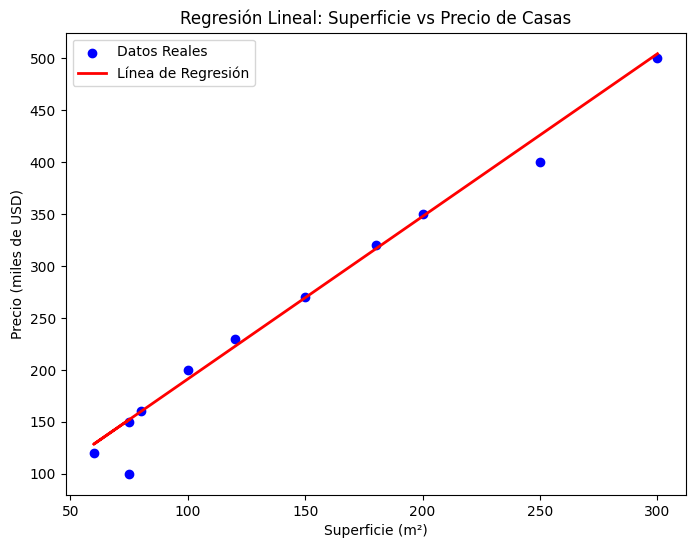

In [31]:
# OPCION 02 statsmodels.api

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Datos de ejemplo: Superficie (m²) vs Precio (miles de USD)
data = {
    'Superficie_m2': [75, 60, 75, 80, 100, 120, 150, 180, 200, 250, 300],
    'Precio_kUSD': [100, 120, 150, 160, 200, 230, 270, 320, 350, 400, 500]
}

df = pd.DataFrame(data)

# Variables predictoras (X) y variable objetivo (y)
X = df[['Superficie_m2']]
y = df['Precio_kUSD']

# Dividir datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Agregar constante para el intercepto
X_train_sm = sm.add_constant(X_train)

# Crear el modelo usando mínimos cuadrados ordinarios (OLS)
modelo_sm = sm.OLS(y_train, X_train_sm).fit()

# Obtener el resumen del modelo
print(modelo_sm.summary())

# Graficar datos y línea de regresión
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Datos Reales')
plt.plot(X, modelo_sm.predict(sm.add_constant(X)), color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel("Superficie (m²)")
plt.ylabel("Precio (miles de USD)")
plt.title("Regresión Lineal: Superficie vs Precio de Casas")
plt.legend()
plt.show()
